Yalnızca tek bir katman içeren İleri Beslemeli Sinir Ağı modeli

Gereksinimler:

In [ ]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install opencv-python
!pip install pandas

Veriyi zip'ten çıkarma:

In [ ]:
import zipfile

# zip dosyasının yolu
zip_file_path = "/content/drive/MyDrive/ChestXray.zip"

# zip dosyasını aç
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/veri")

Veriyi parçalara bölme:

In [ ]:
import os
import cv2
import numpy as np

def load_data():
    normal_path = '/content/veri/ChestXray/NORMAL'
    pneumonia_path = '/content/veri/ChestXray/PNEUMONIA'
    
    normal_images = []
    pneumonia_images = []
    labels = []
    
    for filename in os.listdir(normal_path):
        img = cv2.imread(os.path.join(normal_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        normal_images.append(img)
        labels.append(0)
        
    for filename in os.listdir(pneumonia_path):
        img = cv2.imread(os.path.join(pneumonia_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        pneumonia_images.append(img)
        labels.append(1)
        
    normal_images = np.array(normal_images)
    pneumonia_images = np.array(pneumonia_images)
    labels = np.array(labels)
    
    return normal_images, pneumonia_images, labels
normal_images,pneumonia_images,labels=load_data()

Veriyi train-test olarak bölme:

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense

all_images = np.concatenate((normal_images, pneumonia_images))
all_images = np.expand_dims(all_images, axis=-1) # kanal boyutunu ekleyin
all_labels = np.concatenate((np.zeros(len(normal_images)), np.ones(len(pneumonia_images))))
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2)

İleri Beslemeli Sinir Ağı modeli ve eğitim:

In [ ]:
model = Sequential([
    Flatten(input_shape=(128, 128, 1)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
83/83 [==============================] - 7s 8ms/step - loss: 126.0592 - accuracy: 0.7771 - val_loss: 6.7594 - val_accuracy: 0.9044
Epoch 2/30
83/83 [==============================] - 0s 4ms/step - loss: 27.3774 - accuracy: 0.8363 - val_loss: 6.4026 - val_accuracy: 0.8907
Epoch 3/30
83/83 [==============================] - 0s 4ms/step - loss: 6.8531 - accuracy: 0.9024 - val_loss: 4.7742 - val_accuracy: 0.9150
Epoch 4/30
83/83 [==============================] - 0s 4ms/step - loss: 5.0534 - accuracy: 0.9107 - val_loss: 3.4895 - val_accuracy: 0.9165
Epoch 5/30
83/83 [==============================] - 0s 4ms/step - loss: 8.6378 - accuracy: 0.8815 - val_loss: 10.3121 - val_accuracy: 0.8543
Epoch 6/30
83/83 [==============================] - 0s 4ms/step - loss: 4.1311 - accuracy: 0.9233 - val_loss: 4.7208 - val_accuracy: 0.9165
Epoch 7/30
83/83 [==============================] - 0s 5ms/step - loss: 6.2279 - accuracy: 0.9001 - val_loss: 4.5358 - val_accuracy: 0.9105
Epoch 8/30
83/83

Loss-Accuracy tablosu:

<Axes: >

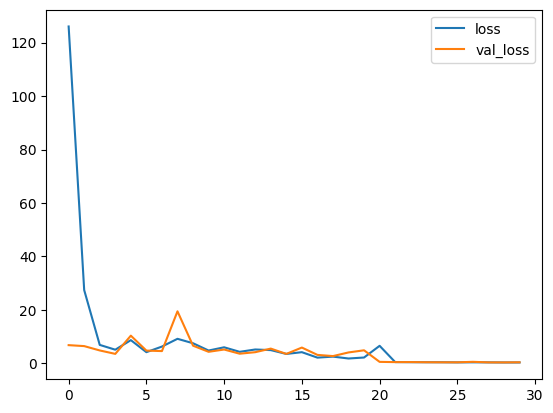

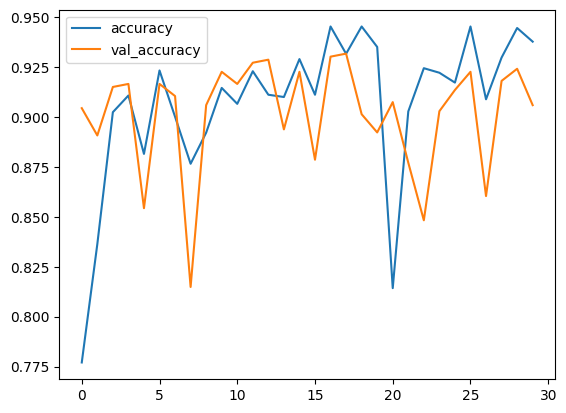

In [ ]:
import pandas as pd
df = pd.DataFrame(model.history.history)
loss=df.drop(["accuracy","val_accuracy"],axis=1)
accuracy=df.drop(["loss","val_loss"],axis=1)
loss.plot()
accuracy.plot()

Test:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

21/21 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.9059
Test Loss: 0.3421761393547058
Test Accuracy: 0.9059180617332458
